# Week9 Regression

Regression models are used to predict a continuous value. Predicting prices of a house given the features of house like size, price etc is one of the common examples of Regression. It is a supervised technique.

In week10, we've covered various types of Regression:
* **Simple Linear Regression**
* **Polynomial Regression**
* **Decision Tree Regression**
* **Random Forest Regression**

The best way to consolidate the knowledge in your mind is by practicing.<br>Please complete the part marked with <span style="color:green">**# TODO**</span>.

[Google](www.google.com), [Python Documentation](https://docs.python.org/3/contents.html), and [scikit-learn Documentation](https://scikit-learn.org/stable/) are your good friends if you have any python questions.

Download **Week9_regression.ipynb** notebook to your local folder and open it with Jupyter Notebook.

### Initializing Packages and Importing Data

Install Python SciPy libraries (ex. `numpy`, `pandas`, `matplotlib`, `seaborn`)
    

In [1]:
# TODO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings # Ignores any warning
warnings.filterwarnings("ignore")


C:\Users\chliu\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


Load Data

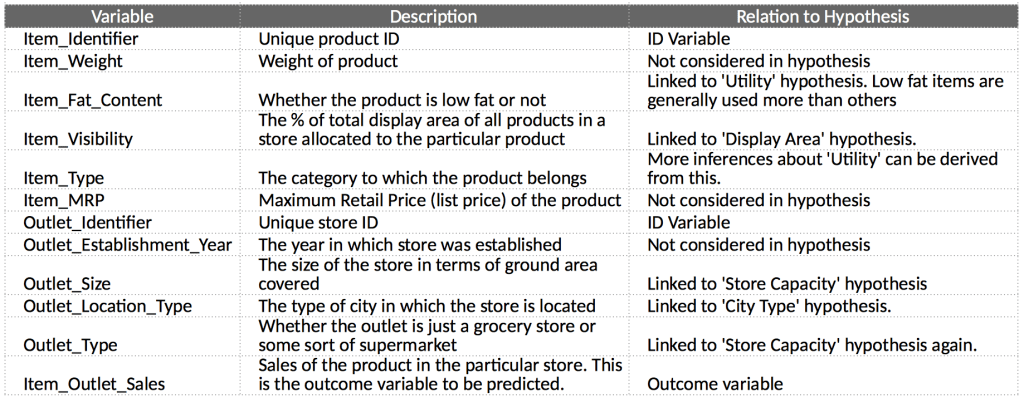

In [2]:
# TODO
data = pd.read_csv("bigmart_data.csv") 
data.head()
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Exploratory Data Analysis (EDA)
1. Univariate Distribution (Numerical and Categorical Variables)
2. Bivariate Distribution
3. Correlation Analysis


<h2>1. Univariate Distribution </h2>
<h3>1.1. Distribution of the target variable : Item_Outlet_Sales<h3>

Text(0.5, 1.0, 'Item_Outlet_Sales Distribution')

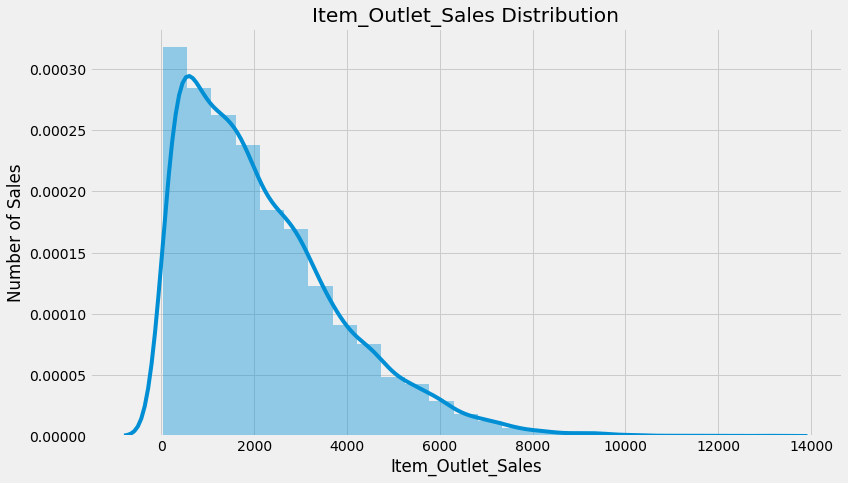

In [3]:
# TODO
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(data.Item_Outlet_Sales, bins = 25)
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,1))
plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Number of Sales")
plt.title("Item_Outlet_Sales Distribution")

<h3>1.2. Distribution of the Item_Fat_Content<h3>

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

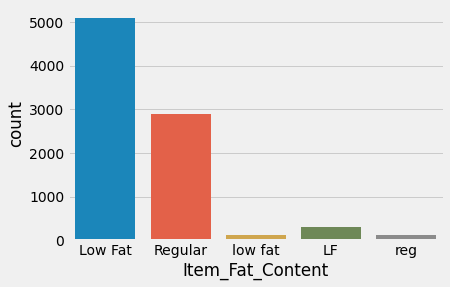

In [4]:
data.Item_Fat_Content.value_counts()
sns.countplot(data.Item_Fat_Content)

<h2>2. Bivariate Distribution</h2>
<h3>2.1. Item_Weight and Item_Outlet_Sales Analysis<h3>

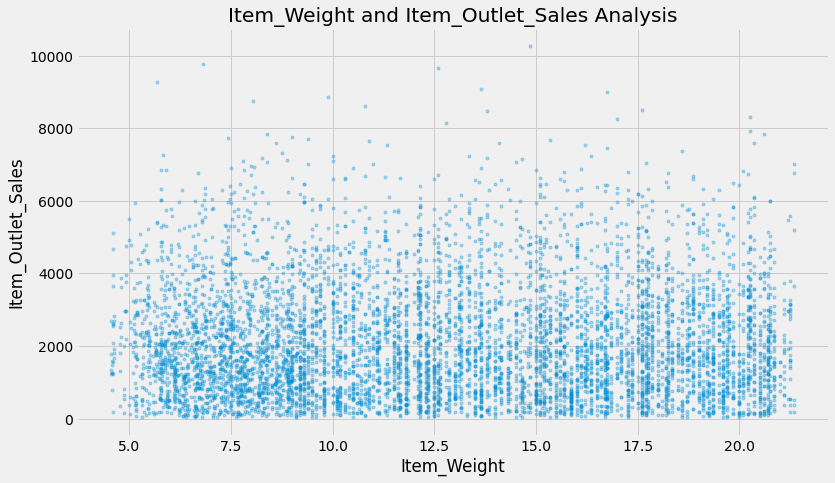

In [5]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_Weight")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Weight and Item_Outlet_Sales Analysis")
plt.plot(data.Item_Weight, data["Item_Outlet_Sales"],'.', alpha = 0.3)

<h3>2.2. Impact of Item_Fat_Content on Item_Outlet_Sales<h3>

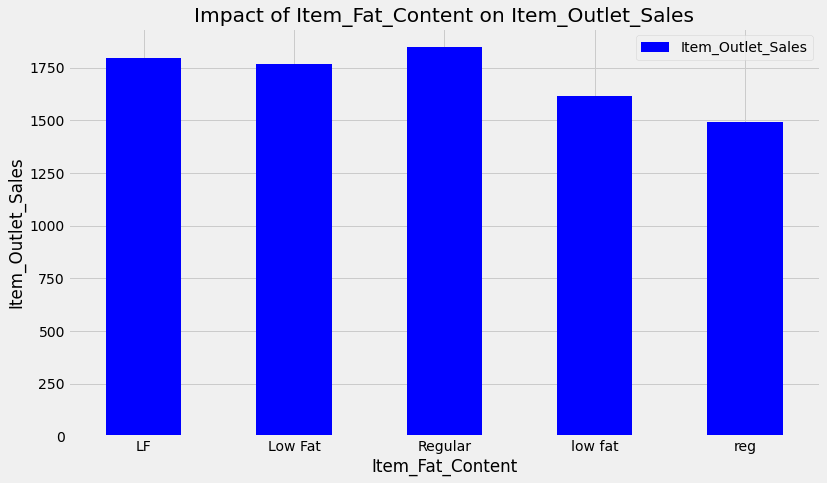

In [6]:
Item_Fat_Content_pivot = \
data.pivot_table(index='Item_Fat_Content', values="Item_Outlet_Sales", aggfunc=np.median)

Item_Fat_Content_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Item_Fat_Content")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Fat_Content on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

<h2>3. Correlation Analysis<h2>

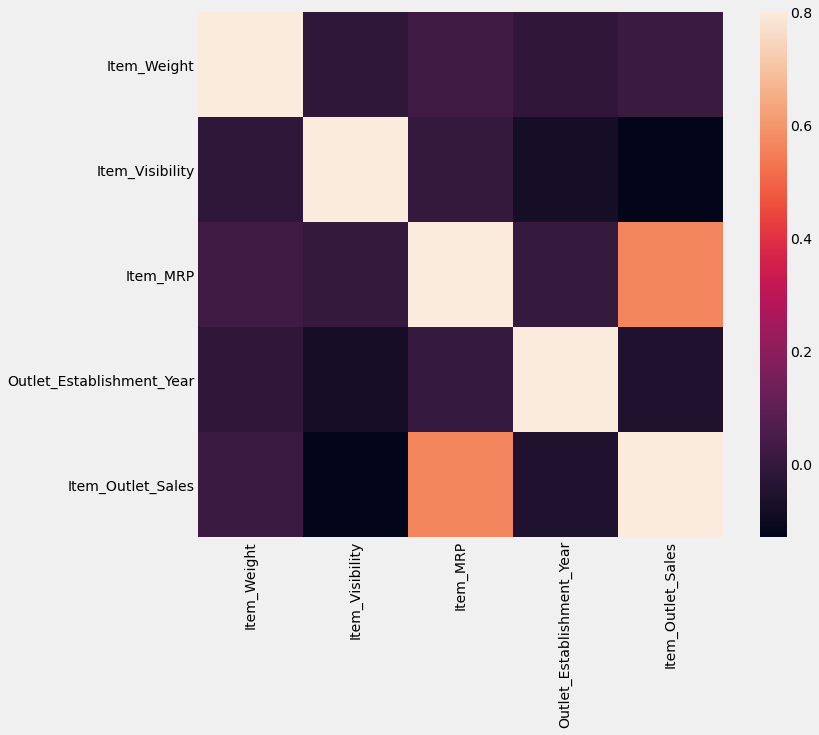

In [7]:
numeric_features = data.select_dtypes(include=[np.number])
numeric_features.dtypes
corr = numeric_features.corr()
#correlation matrix
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=.8, square=True);

### Data Preprocessing

Look for missing values

In [8]:
# TODO
# From data.info() we detected Item_Weight and Outlet_Size have missing values. 
# We chose to impute Item_Weight with mean and Outlet_Size with mode.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Impute missing values

In [9]:
# TODO
data['Item_Weight'].fillna((data['Item_Weight'].mean()), inplace=True)

In [10]:
data['Outlet_Size'].fillna((data['Outlet_Size'].mode()), inplace=True)

Feature engineering -- examine each column, perform necessary steps to prepare your data before modeling

In [11]:
# TODO
#Determine the years of operation of a store
data['Outlet_Years'] = 2019 - data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    8523.000000
mean       21.168133
std         8.371760
min        10.000000
25%        15.000000
50%        20.000000
75%        32.000000
max        34.000000
Name: Outlet_Years, dtype: float64

In [12]:
data.groupby(['Item_Type']).count()
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
data.groupby(['Item_Type_Combined','Item_Type']).count()

Item_Identifier  Item_Weight   
Item_Type_Combined Item_Type                                             
DR                 Dairy                              140          140  \
                   Hard Drinks                        214          214   
                   Soft Drinks                        445          445   
FD                 Baking Goods                       648          648   
                   Breads                             251          251   
                   Breakfast                          110          110   
                   Canned                             649          649   
                   Dairy                              542          542   
                   Frozen Foods                       856          856   
                   Fruits and Vegetables             1232         1232   
                   Meat                               425          425   
                   Seafood                             64           64   
                   Snack Foods                       1200         1200   
                   Starchy Foods                      148          148   
NC                 Health and Hygiene                 520          520   
                   Household                          910          910   
                   Others                             169          169   

                                          Item_Fat_Content  Item_Visibility   
Item_Type_Combined Item_Type                                                  
DR                 Dairy                               140              140  \
                   Hard Drinks                         214              214   
                   Soft Drinks                         445              445   
FD                 Baking Goods                        648              648   
                   Breads                              251              251   
                   Breakfast                           110              110   
                   Canned                              649              649   
                   Dairy                               542              542   
                   Frozen Foods                        856              856   
                   Fruits and Vegetables              1232             1232   
                   Meat                                425              425   
                   Seafood                              64               64   
                   Snack Foods                        1200             1200   
                   Starchy Foods                       148              148   
NC                 Health and Hygiene                  520              520   
                   Household                           910              910   
                   Others                              169              169   

                                          Item_MRP  Outlet_Identifier   
Item_Type_Combined Item_Type                                            
DR                 Dairy                       140                140  \
                   Hard Drinks                 214                214   
                   Soft Drinks                 445                445   
FD                 Baking Goods                648                648   
                   Breads                      251                251   
                   Breakfast                   110                110   
                   Canned                      649                649   
                   Dairy                       542                542   
                   Frozen Foods                856                856   
                   Fruits and Vegetables      1232               1232   
                   Meat                        425                425   
                   Seafood                      64                 64   
                   Snack Foods                1200               1200   
                   Starchy Foods      

In [13]:
#Rename them to more intuitive categories:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Item_Type_Combined
Food              6125
Non-Consumable    1599
Drinks             799
Name: count, dtype: int64

In [14]:
#Change categories of low fat:
print('Original Categories:')
print(data['Item_Fat_Content'].value_counts())

print('\nModified Categories:')
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})

print(data['Item_Fat_Content'].value_counts())

Original Categories:
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

Modified Categories:
Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64


Encode categorical variables (dummy variables)

In [15]:
# TODO
#Dummy Variables:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type_Combined'])

data.dtypes

Item_Identifier                       object
Item_Weight                          float64
Item_Visibility                      float64
Item_Type                             object
Item_MRP                             float64
Outlet_Identifier                     object
Outlet_Establishment_Year              int64
Item_Outlet_Sales                    float64
Outlet_Years                           int64
Item_Fat_Content_Low Fat                bool
Item_Fat_Content_Regular                bool
Outlet_Location_Type_Tier 1             bool
Outlet_Location_Type_Tier 2             bool
Outlet_Location_Type_Tier 3             bool
Outlet_Size_High                        bool
Outlet_Size_Medium                      bool
Outlet_Size_Small                       bool
Outlet_Type_Grocery Store               bool
Outlet_Type_Supermarket Type1           bool
Outlet_Type_Supermarket Type2           bool
Outlet_Type_Supermarket Type3           bool
Item_Type_Combined_Drinks               bool
Item_Type_

In [16]:
data.drop(['Item_Identifier','Item_Type','Outlet_Identifier','Outlet_Establishment_Year'],axis=1,inplace=True)

### Modeling

Split to training set and testing set (Note: test_size = 0.25, random_state = 42)

In [17]:
# TODO
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size = 0.25, random_state = 42)

Define target and predictors (Drop `Item_Identifier` and `Outlet_Identifier`)

In [18]:
# TODO
X_train = train.drop('Item_Outlet_Sales',axis=1)
X_test = test.drop('Item_Outlet_Sales',axis=1)
y_train = train['Item_Outlet_Sales']
y_test = test['Item_Outlet_Sales']

#### Linear Regression

Fit a linear model

In [19]:
# TODO
from sklearn.linear_model import LinearRegression
LR = LinearRegression(normalize=True)
LR = LR.fit(X_train, y_train)

Look at estimated intercept and coefficients

In [20]:
# Todo
coef_lr = pd.Series(LR.coef_,X_train.columns).sort_values()
coef_lr

Item_Type_Combined_Drinks           -1.604290e+16
Item_Type_Combined_Non-Consumable   -1.604290e+16
Item_Type_Combined_Food             -1.604290e+16
Outlet_Type_Grocery Store           -1.036012e+15
Outlet_Type_Supermarket Type2       -1.036012e+15
Outlet_Type_Supermarket Type1       -1.036012e+15
Outlet_Type_Supermarket Type3       -1.036012e+15
Item_Visibility                     -4.050668e+02
Outlet_Years                        -2.819354e+01
Item_Weight                         -2.194393e+00
Item_MRP                             1.567991e+01
Outlet_Size_Small                    1.457301e+02
Outlet_Size_Medium                   2.002435e+02
Outlet_Size_High                     7.538219e+02
Outlet_Location_Type_Tier 3          2.718907e+16
Outlet_Location_Type_Tier 2          2.718907e+16
Outlet_Location_Type_Tier 1          2.718907e+16
Item_Fat_Content_Low Fat             2.956629e+16
Item_Fat_Content_Regular             2.956629e+16
dtype: float64

In [21]:
LR.intercept_

-3.967643678030163e+16

Make predictions on test dataset and plot the true outcome compared to the predicted outcome

In [22]:
# Todo
y_pred = LR.predict(X_test)

Calculate the residual sum of squares and mean squared error

In [23]:
# Todo
from sklearn import model_selection, metrics
rss = np.sum((y_pred - y_test)**2)
print('rss: ', rss)
mse=np.mean((y_pred - y_test)**2)
print('mse: ', mse)

rss:  2528156808.6848445
mse:  1186371.0974588664


We've learned that there are some caveats in the train/test split method. In order to avoid this, we can perform something called cross validation. Try K-Fold Cross Validation (ex. 5-fold)

In [24]:
# Todo
X=data.drop('Item_Outlet_Sales',axis=1)
y=data['Item_Outlet_Sales']
from sklearn import model_selection
kf = model_selection.KFold(n_splits=5)
lr = LinearRegression()
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    lr.fit(X_train,y_train)
    y_pred = lr.predict(X_test)
    rss = np.sum((y_pred - y_test)**2)
    print('rss: ', rss)
    mse=np.mean((y_pred - y_test)**2)
    print('mse: ', mse)

rss:  2258086458.06641
mse:  1324390.8844964283
rss:  2132460222.7132068
mse:  1250709.8080429365
rss:  2111402606.2417867
mse:  1238359.2998485554
rss:  2162482441.543064
mse:  1269062.4656942864
rss:  2216759439.805789
mse:  1300915.1642052752


Plot coefficient graph

<Axes: title={'center': 'Model Coefficients'}>

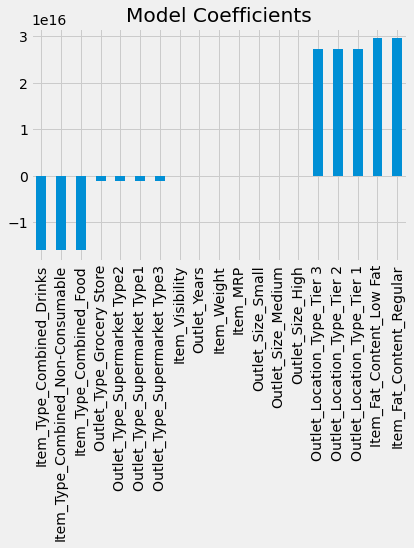

In [25]:
# Todo
coef_lr.plot(kind='bar', title='Model Coefficients')

#### Regularized Linear Regression

If you look at the coefficients, they are very large in magnitude which signifies overfitting. To cater to this, lets use a ridge regression model.

In [26]:
# Todo

X_train = train.drop('Item_Outlet_Sales',axis=1)
X_test = test.drop('Item_Outlet_Sales',axis=1)
y_train = train['Item_Outlet_Sales']
y_test = test['Item_Outlet_Sales']

from sklearn.linear_model import Ridge, RidgeCV
rr=RidgeCV(alphas=np.array([0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 1, 10]), normalize=True, scoring="neg_mean_squared_error", cv=5)
rr.fit(X_train,y_train)
rr.alpha_

0.001

In [27]:
ridge = Ridge(alpha=rr.alpha_,normalize=True)
ridge.fit(X_train,y_train)
y_pred = ridge.predict(X_test)
rss = np.sum((y_pred - y_test)**2)
print('rss: ', rss)
mse=np.mean((y_pred - y_test)**2)
print('mse: ', mse)

rss:  2532170930.416544
mse:  1188254.7772954218


There are so many predictors in the regression model. Can you use a lasso model to apply feature selection?

In [28]:
# Todo
from sklearn.linear_model import Lasso, LassoCV
lassocv=LassoCV(alphas=np.array([0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 1, 10]), normalize=True, cv=5)
lassocv.fit(X_train,y_train)
lassocv.alpha_

0.001

In [29]:
lasso = Lasso(alpha=lassocv.alpha_,normalize=True)
lasso.fit(X_train,y_train)
y_pred = lasso.predict(X_test)
rss = np.sum((y_pred - y_test)**2)
print('rss: ', rss)
mse=np.mean((y_pred - y_test)**2)
print('mse: ', mse)

rss:  2531737355.378129
mse:  1188051.316460877


What are some differences between ridge and lasso, when should we proceed to use each?

https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/

## Submission

Commit your completed **Week9_regression.ipynb** notebook to your personal Github repo you shared with the faculty.